# Phân Tích Dữ Liệu Khách Hàng Dựa Trên Mô Hình RFM

Mô hình RFM (Recency, Frequency, Monetary) là một trong những phương pháp phổ biến để phân đoạn khách hàng dựa trên hành vi mua hàng. Trong dự án này, chúng ta sẽ sử dụng mô hình RFM để phân tích và phân cụm dữ liệu khách hàng từ tệp `data.csv`. Các thư viện cần thiết sẽ được nhập vào trước khi bắt đầu phân tích.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Định cấu hình cho đồ thị
sns.set()

# Load dữ liệu
file_path = 'data.csv'
data = pd.read_csv(file_path)


## Thông Tin Cơ Bản Về Dữ Liệu

Trước khi bắt đầu quá trình phân tích, chúng ta sẽ hiển thị một vài thông tin cơ bản về dữ liệu như một số dòng đầu tiên và mô tả tổng quan về các cột để hiểu rõ hơn về dữ liệu đầu vào.


In [3]:
# Hiển thị một vài thông tin cơ bản về dữ liệu
print(data.head())
print(data.info())


                     user_pseudo_id  recency  frequency  monetary
0  e4dfe4fb9651706c9f4d269e1e565044      256          1         0
1  d1f4569625eab3b249c3cd200d1c4fd6      512          1         0
2  1bc15184753def3334b67f8045cbb1fb      512          1         0
3  b18d3f1e73bea0ec88ff447fa5193a11      512          1         0
4  d1e3bcced12dfde70031d643fc191da2      512          1         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_pseudo_id  25000 non-null  object
 1   recency         25000 non-null  int64 
 2   frequency       25000 non-null  int64 
 3   monetary        25000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 781.4+ KB
None


## Chuẩn Bị Dữ Liệu RFM Cho Phân Cụm

Chúng ta sẽ lựa chọn các cột liên quan đến RFM (Recency, Frequency, Monetary) từ dữ liệu ban đầu. Sau đó, sử dụng phương pháp chuẩn hóa để đưa các giá trị RFM về cùng một đơn vị đo lường, giúp quá trình phân cụm hiệu quả hơn.


In [4]:
# Chọn các cột RFM để chuẩn bị cho phân cụm
rfm_data = data[['recency', 'frequency', 'monetary']]

# Chuẩn hóa dữ liệu RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Kiểm tra dữ liệu đã chuẩn hóa
print(pd.DataFrame(rfm_scaled, columns=['recency', 'frequency', 'monetary']).head())


    recency  frequency  monetary
0 -0.624943  -0.600268  -0.11433
1  0.540118  -0.600268  -0.11433
2  0.540118  -0.600268  -0.11433
3  0.540118  -0.600268  -0.11433
4  0.540118  -0.600268  -0.11433


## Xác Định Số Lượng Cụm Tối Ưu (Phương Pháp Elbow)

Để tìm ra số lượng cụm tối ưu cho phân cụm KMeans, chúng ta sẽ sử dụng phương pháp Elbow. Biểu đồ Elbow sẽ hiển thị mối quan hệ giữa số lượng cụm và tổng bình phương khoảng cách (SSE), giúp xác định giá trị `k` thích hợp.


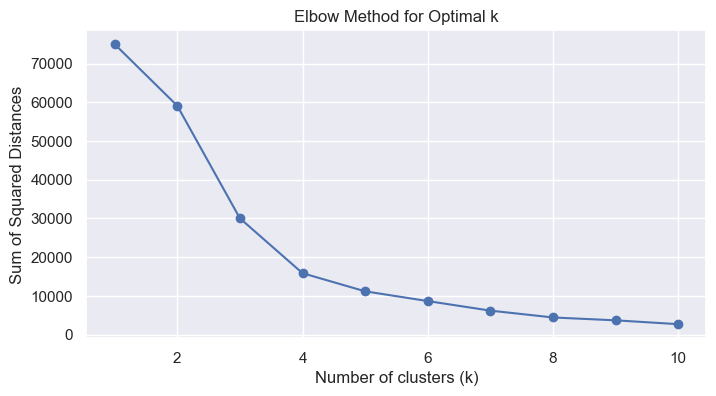

In [5]:
# Tìm số lượng cụm tối ưu bằng phương pháp Elbow
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()


## Thực Hiện Phân Cụm Khách Hàng

Sau khi xác định được số lượng cụm tối ưu từ phương pháp Elbow, chúng ta sẽ áp dụng thuật toán KMeans để phân cụm khách hàng thành 4 nhóm dựa trên các giá trị RFM đã chuẩn hóa.


In [7]:
# Chọn k = 4 (sau khi phân tích phương pháp Elbow) và thực hiện phân cụm
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(rfm_scaled)

# Kiểm tra số lượng khách hàng trong mỗi cụm
print(data['cluster'].value_counts())


cluster
0    9723
2    8653
1    6334
3     290
Name: count, dtype: int64


## Phân Tích Các Cụm Khách Hàng

Chúng ta sẽ phân tích các giá trị trung bình của R, F, M trong mỗi cụm để hiểu rõ hơn về đặc điểm của từng cụm khách hàng, giúp cho việc gán nhãn và đưa ra chiến lược kinh doanh phù hợp.


In [8]:
# Tính các giá trị trung bình của R, F, M trong mỗi cụm để hỗ trợ việc gán nhãn
cluster_analysis = data.groupby('cluster')[['recency', 'frequency', 'monetary']].mean()
print(cluster_analysis)


            recency  frequency    monetary
cluster                                   
0        208.723645   1.000000    0.007199
1        335.083675   2.000000    2.164509
2        648.491853   1.000000    0.000000
3        240.496552   1.993103  132.551724


## Gán Nhãn Cho Các Nhóm Khách Hàng

Dựa trên phân tích đặc điểm của từng cụm, chúng ta sẽ gán nhãn cho các nhóm khách hàng để dễ dàng nhận biết và quản lý. Các nhãn bao gồm: Khách hàng VIP, Khách hàng Thường xuyên, Khách hàng Tiềm năng, và Khách hàng Không hoạt động.


In [9]:
# Cập nhật gán nhãn khách hàng dựa trên tiêu chí chính xác hơn
# Khách hàng VIP: R thấp, F cao, M cao
# Khách hàng Thường xuyên: R trung bình, F trung bình, M trung bình
# Khách hàng Tiềm năng: R cao, F thấp, M trung bình hoặc cao
# Khách hàng Không hoạt động: R rất cao, F rất thấp, M rất thấp

cluster_labels = {
    0: 'Khách hàng Tiềm năng', 
    1: 'Khách hàng Thường xuyên', 
    2: 'Khách hàng Không hoạt động', 
    3: 'Khách hàng VIP'  
}

# Áp dụng gán nhãn cho các cụm dựa trên phân tích trên
data['segment'] = data['cluster'].map(cluster_labels)

# Hiển thị kết quả phân cụm với nhãn khách hàng mới
print(data[['user_pseudo_id', 'recency', 'frequency', 'monetary', 'segment']].head())


                     user_pseudo_id  recency  frequency  monetary  \
0  e4dfe4fb9651706c9f4d269e1e565044      256          1         0   
1  d1f4569625eab3b249c3cd200d1c4fd6      512          1         0   
2  1bc15184753def3334b67f8045cbb1fb      512          1         0   
3  b18d3f1e73bea0ec88ff447fa5193a11      512          1         0   
4  d1e3bcced12dfde70031d643fc191da2      512          1         0   

                      segment  
0        Khách hàng Tiềm năng  
1  Khách hàng Không hoạt động  
2  Khách hàng Không hoạt động  
3  Khách hàng Không hoạt động  
4  Khách hàng Không hoạt động  


## Trực Quan Hóa Kết Quả Phân Đoạn

Để hiểu rõ hơn về phân bố khách hàng trong các phân đoạn, chúng ta sẽ tạo một biểu đồ cột thể hiện số lượng khách hàng trong từng phân đoạn dựa trên mô hình RFM.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10204\3763984800.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


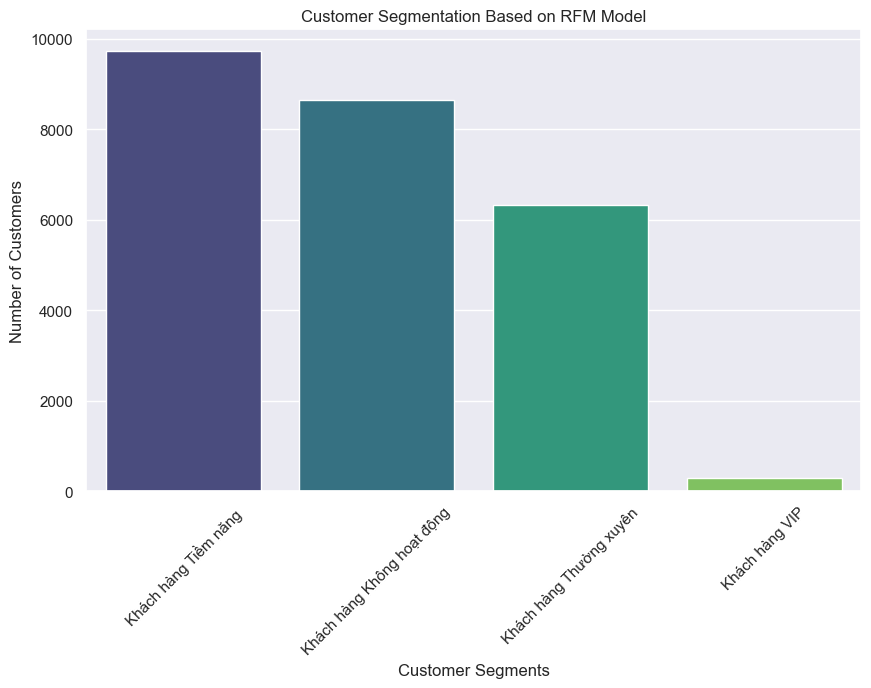

In [10]:
# Đếm số lượng khách hàng trong từng phân đoạn
segment_counts = data['segment'].value_counts()

# Tạo biểu đồ cho các phân đoạn khách hàng
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')

# Thêm nhãn và tiêu đề
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Based on RFM Model')
plt.xticks(rotation=45)
plt.show()


## Phân Tích Chi Tiết Giá Trị RFM

Cuối cùng, chúng ta sẽ xem xét chi tiết về các giá trị RFM trong từng phân đoạn khách hàng để có cái nhìn tổng quan hơn về từng nhóm. Thông tin này giúp doanh nghiệp hiểu rõ hơn về hành vi và giá trị của khách hàng trong mỗi phân đoạn.


In [11]:
# Kiểm tra chi tiết về các giá trị RFM trong mỗi phân đoạn
for segment, subset in data.groupby('segment'):
    print(f"Segment: {segment}")
    print(subset[['recency', 'frequency', 'monetary']].describe())
    print("\n")


Segment: Khách hàng Không hoạt động
           recency  frequency  monetary
count  8653.000000     8653.0    8653.0
mean    648.491853        1.0       0.0
std      87.814933        0.0       0.0
min     429.000000        1.0       0.0
25%     583.000000        1.0       0.0
50%     691.000000        1.0       0.0
75%     722.000000        1.0       0.0
max     738.000000        1.0       0.0


Segment: Khách hàng Thường xuyên
           recency  frequency     monetary
count  6334.000000     6334.0  6334.000000
mean    335.083675        2.0     2.164509
std     158.672818        0.0     9.292215
min      28.000000        2.0     0.000000
25%     269.000000        2.0     0.000000
50%     291.000000        2.0     0.000000
75%     524.000000        2.0     0.000000
max     563.000000        2.0    60.000000


Segment: Khách hàng Tiềm năng
           recency  frequency     monetary
count  9723.000000     9723.0  9723.000000
mean    208.723645        1.0     0.007199
std      75.414170   